#  回帰分析



## 単回帰分析

ここではまず、説明変数が１つの単回帰（Simple Regression）を考えます。

$y_i = \beta_0+\beta_1x_i+\epsilon_i$


* $y_i$： 被説明変数（explained variable）, 従属変数（dependent variable）,アウトカム（outcome variable）など

* $x_i$： 説明変数（explanatory variable）, 独立変数（independent variable）など

* $\epsilon_i$： 誤差項（erros, error terms) 平均はゼロと仮定

* $i$： 観測値のインデックス

* $\beta_0$：定数項、切片パラメター

* $\beta_1$：係数パラメター、傾きパラメター

最小二乗法推定法（Ordinary Least Squares; OLS）やモーメント法、最尤法などで推定できます。

最小二乗法の場合は、

$\sum_{i=1}^{n}(y_i-\beta_0-\beta_1x_i)^2$ を最小化する$\beta_0$, $\beta_1$を求めます

推定した係数$\beta_1$は被説明変数$y_i$に対する説明変数$x_i$の影響度合いを表す<strong>限界効果</strong>、あるいは説明変数が１単位変化した場合の被説明変数の変化（$\frac{\delta y_i}{\delta x_i}$）と解釈することができます。



ここでは`statsmodels` を用いて単回帰分析を行います。

`statsmodels`は線形回帰、一般化線形モデル、制限付き従属変数モデル、ARIMA、VARモデルなどをカバーするパッケージです。


In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

回帰分析で用いるデータを読み込みます。

ここでは、`statsmodels`に付属する`statecrime`というデータセットの1つで、1996年`American National Elections Study`のデータを用いて回帰分析を行います。

In [18]:
data = sm.datasets.statecrime.load_pandas().data

In [19]:
# dataの最初の2行を表示
data.head(2)

,violent,murder,hs_grad,poverty,single,white,urban
state,,,,,,,
Alabama,459.9,7.1,82.1,17.5,29.0,70.0,48.65
Alaska,632.6,3.2,91.4,9.0,25.5,68.3,44.46


このデータは以下のデータを格納しています

* state: 州の名前
* violent: 暴力犯罪発生率／人口10万人。殺人を含む
* murder: 殺人事件の発生率／人口10万人
* hs_grad: 高等学校以上を卒業した人口の割合
* poverty: 貧困線以下の人口の割合
* white: 白人のみの人口の割合
* single: 片親のいる家族世帯の割合
* urban: 市街化区域に住む人口の割合

`murder` 殺人事件の発生率を被説明変数($y_i$)、`poverty`貧困人口の割合を説明変数($x_i$)とした単回帰分析を行います。

In [43]:
mod = sm.OLS.from_formula('murder ~ poverty', data = data)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 murder   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     20.36
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           4.03e-05
Time:                        20:13:27   Log-Likelihood:                -128.98
No. Observations:                  51   AIC:                             262.0
Df Residuals:                      49   BIC:                             265.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.8989      1.998     -1.952      0.0

** その他の結果の表の読み方は[このページ](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.html)を参照してください。

$\beta_0$の推計値は`intercept`行、`coef`列の値`-3.8989`です。
$\beta_1$の推計値は`poverty`行、`coef`列の値`0.6351`です。
すなわち、$\beta_1$は貧困人口の割合が1ポイント高い場合、殺人事件発生率は何ポイント変化するかを示しています。
今回の単回帰分析推定結果からは貧困人口の割合が1ポイント高い場合、殺人事件発生率は約0.6ポイント高いことを示しています。

また、回帰モデルの当てはまりの良さは自由度調整済決定係数`Adj. R-squared`で確認できます。
0から1までの間の値で、値が大きいほど回帰直線がデータをうまく説明できている（フィットしている）ことになります。

回帰分析の結果を図で確認します。

$\hat{y}$予測値を取得し、その上で回帰直線を示します。

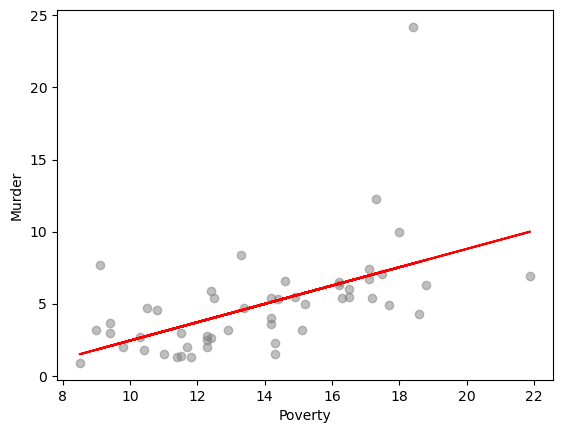

In [50]:
y = data['murder']
x = data['poverty']
y_hat = res.fittedvalues
plt.scatter(x=x, y=y, color = 'grey', alpha= .5)
plt.plot(x, y_hat, color = 'red')
plt.xlabel('Poverty')
plt.ylabel('Murder')
plt.show()

最小二乗法のイメージを図で掴んでみます。

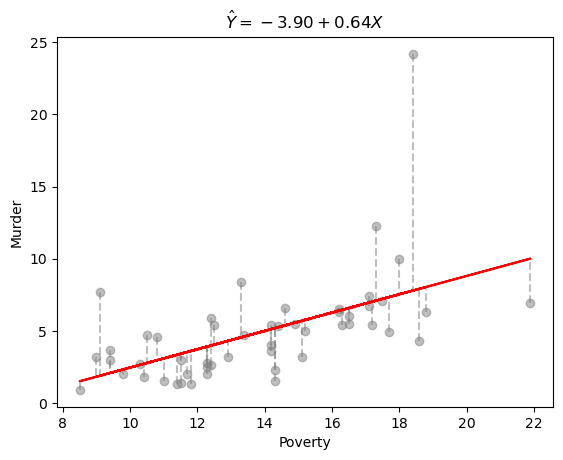

In [58]:
for i in range(len(y)):
    dot_fitted_values = [x[i], x[i]]
    dot_org_values = [y[i], y_hat[i]]
    plt.plot(dot_fitted_values, dot_org_values, linestyle='--', 
             color='grey',alpha=0.5)
plt.scatter(x=x, y=y, color = 'grey', alpha= .5)
plt.plot(x, y_hat, color = 'red')
plt.xlabel('Poverty')
plt.ylabel('Murder')
plt.title(r'$\hat Y = {:.2f}+{:.2f}X$'.format(res.params[0], res.params[1]))
plt.show()

上の図で灰色のプロットは観測値で、赤い実線は推定した回帰線です。

灰色の波線は$y_i$と$\hat{y_i}$の差、残差(residual)$\epsilon_i$を示します。

$$\epsilon_i = Y_i - \hat{Y-i} = Y_i - \hat{\beta_1} - \hat{\beta_2}X_i$$

最小二乗法ではRSS(residual sum of squares)$RSS=\sum_{i=1}^n\epsilon_i^2$を最小化する$\beta_1$と$\beta_2$を推定します。